# Controller for the locking of the laser

In [163]:
%load_ext autoreload
%autoreload 2

from GettingStarted_lib.Interface import Interface
from GettingStarted_lib.LaserLockingController import LaserLockingController
import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Creating the interface:

It contains everything is needed for the comunications with the linien server in the RedPitaya.
- connection to the board;
- Initialization of the parameters;
- Parameters modification.

In [164]:
RP_Interface = Interface()

2025-12-09 08:29:27 - Interface - INFO - Configuration loaded from /home/bec3/Desktop/Simone_Damian/Serafini/GettingStarted_lib/connect_config.yaml:

2025-12-09 08:29:27 - Interface - INFO - Attempting connection via RedPitaya_K address (192.168.1.159:18862)


linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       ERROR    Server is not running. Launching it!


2.1.0


linien_client.deploy           DEBUG    Sending credentials
linien_client.deploy           DEBUG    Starting server


linien_server.cli              DEBUG    Copied linien-server.service to /etc/systemd/system
linien_server.cli              INFO     Starting Linien server
linien_server.cli              INFO     Started Linien server


linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still not running, waiting (may take some time).
linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       INFO     Server still

2025-12-09 08:29:57 - Interface - INFO - Connected to device via RedPitaya_K address


In [59]:
pprint.pprint(vars(RP_Interface))

{'DEVICES': {'RedPitaya_K': {'ip': '192.168.1.159',
                             'linien_port': 18862,
                             'ssh_port': 22}},
 'PASSWORD': 'root',
 'USERNAME': 'root',
 'client': <linien_client.connection.LinienClient object at 0x7078b400df30>,
 'device': Device(key='dhmtcalcvf',
                  name='',
                  host='192.168.1.159',
                  port=18862,
                  username='root',
                  password='root',
                  parameters={}),
 'logger': <Logger Interface (INFO)>,
 'readable_params': {'control_signal_history': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffea40>,
                     'monitor_signal_history': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffc1f0>,
                     'sweep_signal': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffdc00>},
 'writeable_params': {'big_offset': <GettingStarted_lib.Interface.WriteableParameter object at 0x70

In [189]:
RP_Interface.client.parameters.check_for_changed_parameters()
params = RP_Interface.client.parameters
for name, param in vars(params).items():
    # Only pick those attributes that are actual Linien parameters
    if hasattr(param, "value"):
        print(f"{name}: {param.value}")

_async_changed_parameters_queue: [('ping', 1969)]
to_plot: b'\x80\x04\x95\x1e1\x00\x00\x00\x00\x00\x00}\x94(\x8c\x0cerror_signal\x94\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01M\x00\x08\x85\x94h\x05\x8c\x05dtype\x94\x93\x94\x8c\x02i2\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01<\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94b\x89B\x00\x10\x00\x00\xfe\xff\xfe\xff\xfe\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xfc\xff\xf

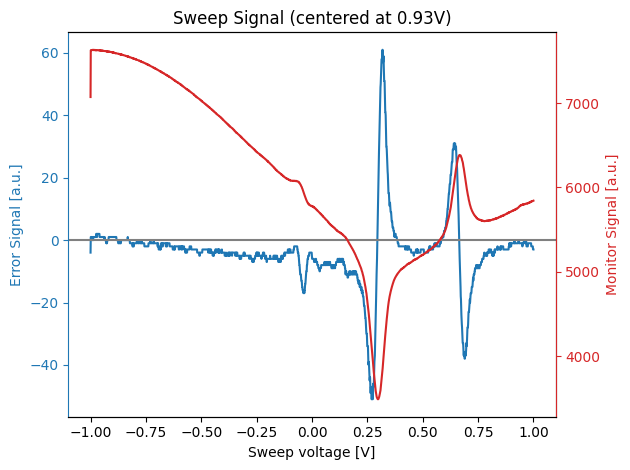

In [185]:
RP_Interface.plot_sweep()

In [184]:
RP_Interface.adjust_vertical_offset()

Actual offset_a: 0.0
New offset_a set to: 5.0


In [186]:
RP_Locking_Controller = LaserLockingController(RP_Interface)

2025-12-09 08:58:52 - LaserLockingController - INFO - LaserLockController initialized successfully.


Expected lock monitor signal point: [1448, 6365]


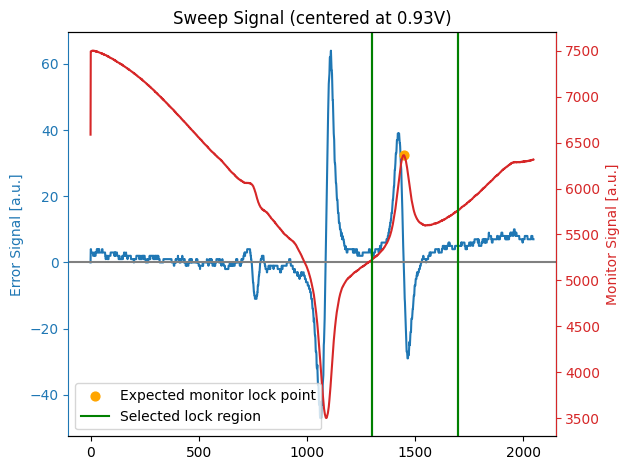

checking lock status...
checking lock status...
checking lock status...
checking lock status...
Locking the laser worked! \o/


In [192]:
RP_Interface.start_sweep()
RP_Locking_Controller.start_manual_locking()

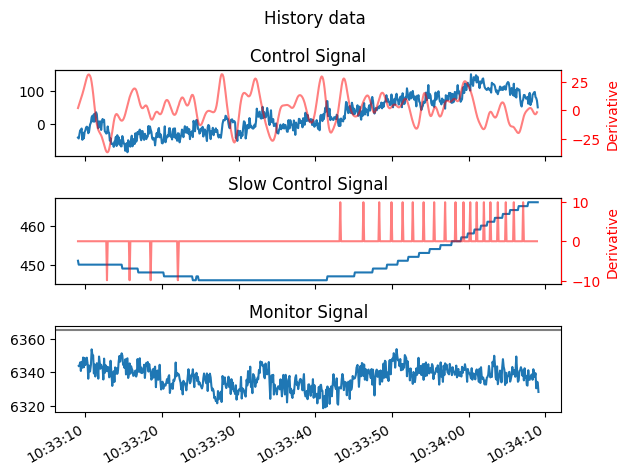

KeyboardInterrupt: 

In [194]:
RP_Locking_Controller.start_locking_monitor()

In [129]:
RP_Interface.start_sweep()

## Analog out test

In [179]:
RP_Interface.check_for_changed_parameters()
RP_Interface.get_remote_value('big_offset')

16383.6

In [182]:
RP_Interface.client.parameters.analog_out_1.value = 0.93*18204 #original 0.93
RP_Interface.write_registers()